Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (10000, 28, 28, 32)    │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (10000, 14, 14, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (10000, 14, 14, 64)    │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (10000, 7, 7, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (10000, 3136)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (10000, 1024)          │     3,212,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (10000, 64)            │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (10000, 10)            │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,330,634 (12.71 MB)

 Trainable params: 3,330,634 (12.71 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.9245 - loss: 0.2341 - val_accuracy: 0.9831 - val_loss: 0.0491
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9883 - loss: 0.0385 - val_accuracy: 0.9889 - val_loss: 0.0334
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9923 - loss: 0.0255 - val_accuracy: 0.9821 - val_loss: 0.0560
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9936 - loss: 0.0215 - val_accuracy: 0.9889 - val_loss: 0.0372
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9957 - loss: 0.0144 - val_accuracy: 0.9929 - val_loss: 0.0269


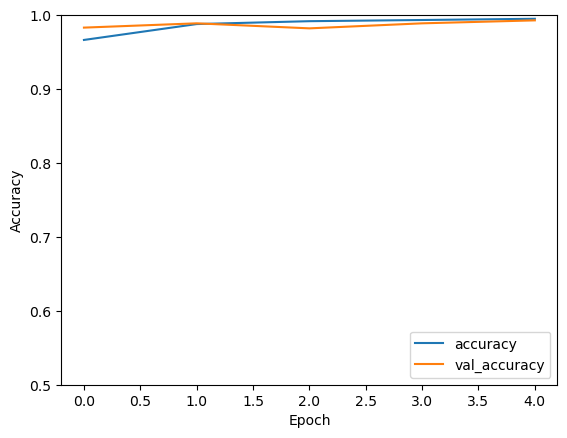

313/313 - 2s - 5ms/step - accuracy: 0.9929 - loss: 0.0269


[0.0269406046718359, 0.992900013923645]

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers, losses, metrics,datasets


def plot_training(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()


(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.reshape(60000, 28, 28, 1)

model = tf.keras.Sequential([
    layers.Conv2D(32, (5, 5), padding="SAME", activation="relu"),
    # layers.Conv2D(1, (5, 5), padding="SAME", activation="relu"),
    # here we define the first convolution layer with 32 kernels/neurons of kernel size 5x5, activation function of relu
    layers.MaxPool2D(2, 2, padding="same"),
    # we define a max pooling with the size of 2x2, the input the the returned value after convolution
    layers.Conv2D(64, (5, 5), padding="SAME", activation="relu"),
    layers.MaxPool2D(2, 2, padding="same"),
    layers.Flatten(),
    layers.Dense(1024, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])


model.build((10000, 28, 28, 1))
model.summary()
# to review the structure of your network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))
plot_training(history)
model.evaluate(x_test, y_test, verbose=2)
# you are likely to have a similar accuracy in comparison with using NN only